<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/moneyVND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [13]:
trainset='/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/moneys/'

In [14]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 810 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [15]:
validation_set.class_indices

{'10000': 0, '20000': 1, '50000': 2}

In [16]:
{'.ipynb_checkpoints': 0,
 '10000': 1,
 '20000': 2,
 '50000': 3,
 }

{'.ipynb_checkpoints': 0, '10000': 1, '20000': 2, '50000': 3}

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
7/7 [==============================] - 159s 21s/step - loss: 4.4364 - accuracy: 0.3296 - val_loss: 1.0963 - val_accuracy: 0.3333
Epoch 2/50
7/7 [==============================] - 94s 13s/step - loss: 1.1023 - accuracy: 0.3407 - val_loss: 1.0956 - val_accuracy: 0.3333
Epoch 3/50
7/7 [==============================] - 94s 13s/step - loss: 1.0963 - accuracy: 0.3444 - val_loss: 1.0918 - val_accuracy: 0.4444
Epoch 4/50
7/7 [==============================] - 95s 13s/step - loss: 1.0812 - accuracy: 0.4333 - val_loss: 1.0712 - val_accuracy: 0.3556
Epoch 5/50
7/7 [==============================] - 95s 13s/step - loss: 1.0675 - accuracy: 0.4062 - val_loss: 1.0462 - val_accuracy: 0.4333
Epoch 6/50
7/7 [==============================] - 95s 13s/step - loss: 1.0266 - accuracy: 0.5148 - val_loss: 0.9633 - val_accuracy: 0.5111
Epoch 7/50
7/7 [==============================] - 93s 13s/step - loss: 0.9234 - accuracy: 0.5272 - val_loss: 1.0001 - val_accuracy: 0.6333
Epoch 8/50
7/7 [==========

In [19]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 810 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [20]:

model.save('monan14.hs')

In [21]:

model1=load_model('monan14.hs')

In [22]:

label = ['10000vnd','20000vnd','50000vnd']

1/1 [==============================] - 1s 515ms/step
10000vnd


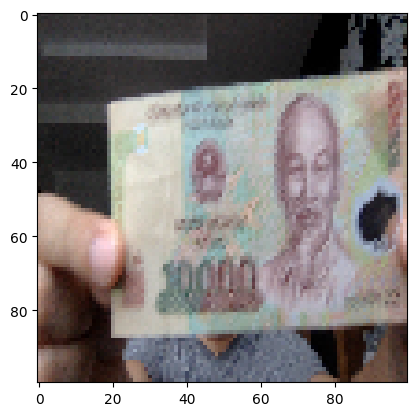

In [23]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/103.png', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 99ms/step
50000vnd


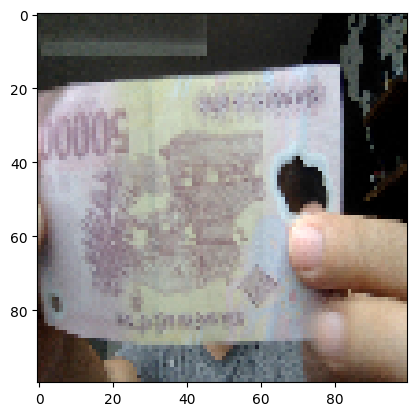

In [24]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/50k (1).png', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])